# **Scool Meal Recognition**
## [書面報告](https://drive.google.com/file/d/1G050aYlY3ozJUZbqoS5Fs-babf1cROdb/view?usp=sharing)
## [資料集來源](https://fatraceschool.k12ea.gov.tw/frontend/)

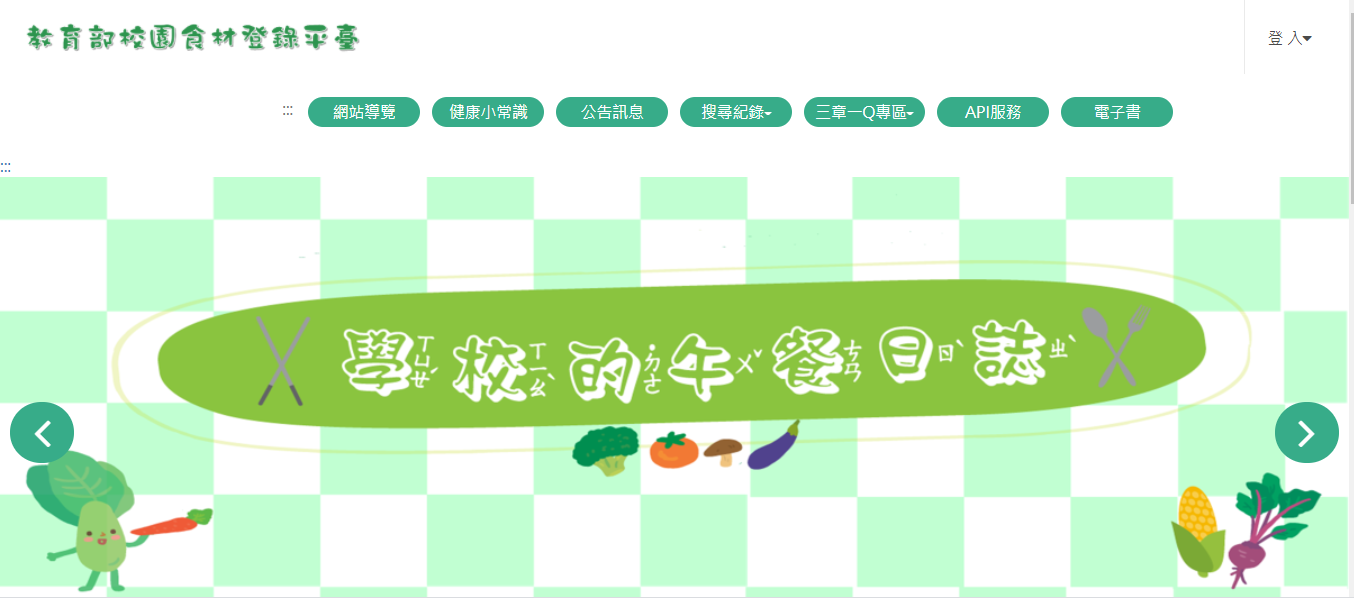
### Target

* **辨識國小國中共`50`種營養午餐配菜**

### Evaluation

* **Top-1 accuracy : 即對圖片進行預測時，機率最大的結果為正確答案，才視為正確。**
* **Top-5 accuracy : 即對圖片進行預測時，機率排序後的前五的結果中包含正確答案，即視為正確。**

### Train & Test Data

* **[Train data](https://drive.google.com/drive/folders/1Rnf_U76mdnqhWFJ5sDwDmFb1BSaGTwZi?usp=sharing)**
* **[Test data](https://drive.google.com/drive/folders/1hvqJSu0mTtWortCsOps4nggrtHLFrZA6?usp=sharing)**

### 本次的模型
* **對VGG16使用Trasfer Learning**

## Step 1 計算總執行時間
* 把執行時間列入模型好壞的考量

In [4]:
import time
EXECUTION_START_TIME = time.time()

## Step 2 確任Colab的GPU
* 以便確認跑模型的速度

In [5]:
! /opt/bin/nvidia-smi

Sat Jul  3 11:42:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## STEP 3. DATA Preprocessing - 將資料分成training data 跟 validation data



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
from sklearn.model_selection import train_test_split
import tensorflow

In [9]:
#匯入的雲端
base_dir = '/content/gdrive/MyDrive/四下/FINAL_PROJECT/Train/train'

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [11]:
img_height=224
img_width=224
batch_size=64

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset = 'training' ,
  seed = 1020,
  image_size = (img_height , img_width),
  batch_size = 64
)

Found 27933 files belonging to 50 classes.
Using 22347 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset = 'validation',
    seed = 1020,
    image_size=(img_height,img_width),
    batch_size = 64
)

Found 27933 files belonging to 50 classes.
Using 5586 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['三杯雞', '什錦炒麵', '咖哩雞', '塔香海茸', '大陸妹', '客家小炒', '小番茄', '有機小松菜', '有機青松菜', '木瓜', '柳丁', '棗子', '橘子', '沙茶肉片', '油菜', '洋蔥炒蛋', '滷蛋', '滷雞腿', '玉米炒蛋', '瓜仔肉', '番茄炒蛋', '白米飯', '白菜滷', '福山萵苣', '空心菜', '糖醋雞丁', '紅蘿蔔炒蛋', '義大利麵', '芥藍菜', '菠菜', '葡萄', '蒜泥白肉', '蒸蛋', '蓮霧', '螞蟻上樹', '西瓜', '豆芽菜', '關東煮', '青江菜', '香蕉', '香酥魚排', '馬鈴薯燉肉', '高麗菜', '鳳梨', '鵝白菜', '鹽酥雞', '麥克雞塊', '麻婆豆腐', '麻油雞', '黑胡椒豬柳']


# STEP 4. Matplolib 顯示中文



In [15]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

In [16]:
# 從 Google API 上下載字體放到暫存資料夾底下
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

--2021-07-03 11:43:30--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  78.3MB/s    in 1.5s    

2021-07-03 11:43:32 (78.3 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  
  inflating:

In [17]:
# 指定字體
font_dirs =['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

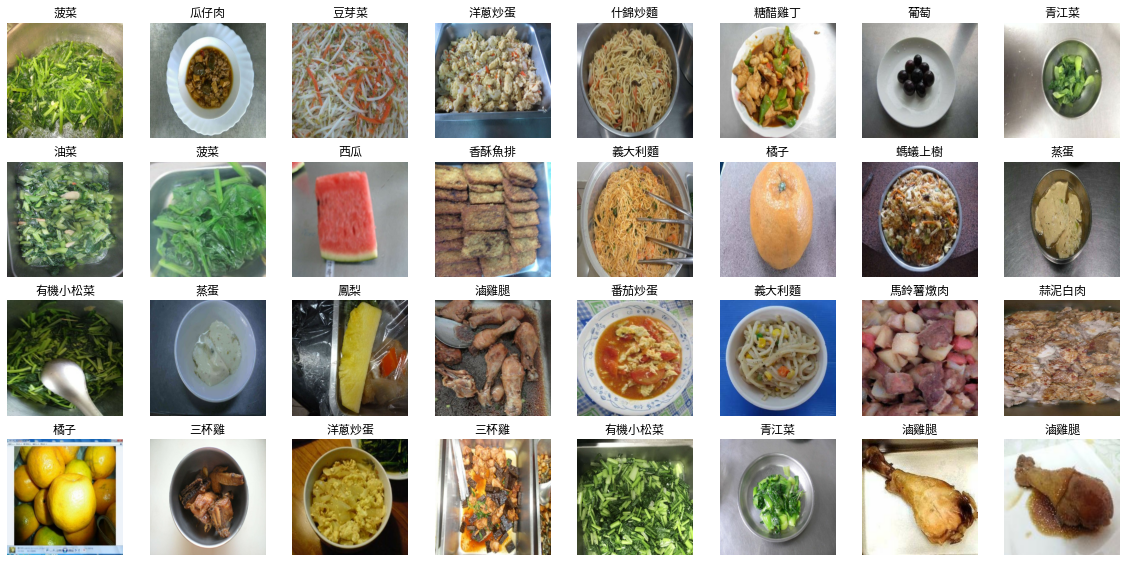

In [18]:
plt.figure(figsize=(20,20))
for images,labels in train_ds.take(1):
  for i in range(32):
    ax = plt.subplot(8,8,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# STEP 5 Data Input Pipeline

In [41]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# STEP 6 Keras preprocessing layer
* 允許開發者建立Keras適用的處理Pipeline
* 允許開法者在每次batch匯入都能進行前處理的layer

In [99]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

In [42]:
data_augmentation = keras.Sequential(
    [
     preprocessing.RandomFlip("horizontal"),
     preprocessing.RandomTranslation(height_factor=0.1,
                     width_factor=0.1),
     preprocessing.RandomRotation(0.1),
     preprocessing.RandomZoom(0.1),
    ]
)

# Step7 將畫素轉成0~1之間

In [43]:
rescaling_layer = keras.Sequential(
    [
     preprocessing.Rescaling(
         scale=1./255,
     ),
    ]
)

In [100]:
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from keras.layers import Input

In [101]:
from tensorflow.python.keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow import keras as k
from keras import backend as K


In [44]:
inputs = layers.Input(shape=(img_height,img_width,3))
x = data_augmentation(inputs)
x = rescaling_layer(x)

# Step8 匯入模型進行Transfer Learning

In [46]:
vgg16 = k.applications.VGG16(weights='imagenet', input_tensor=x, include_top=False)
vgg16.trainable = False

model= k.models.Sequential([
                  vgg16,
                  k.layers.Dropout(0.2),
                  k.layers.Dense(512, activation='relu'),
                  k.layers.BatchNormalization(),
                  k.layers.Dropout(0.1),
                  k.layers.Dense(256, activation='relu'),
                  k.layers.BatchNormalization(),
                  k.layers.Dropout(0.1),
                  tf.keras.layers.GlobalAveragePooling2D(),
                  k.layers.Dense(50, activation='softmax')
])

# Step9 設Early Stopping 與 Checkpoint

In [47]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


In [48]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
  optimizer=optimizer, loss="sparse_categorical_crossentropy",
  metrics=['accuracy',tensorflow.keras.metrics.SparseTopKCategoricalAccuracy
                       (k=5,name="top5 accuracy")]
   )

In [49]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
lrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.2, min_lr= 1e-6, verbose=1)

# Step10 訓練資料

In [50]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=35,
    callbacks = [callback,model_checkpoint_callback,lrop]
)


Epoch 1/35
350/350 [==============================] - 3720s 11s/step - loss: 2.1292 - accuracy: 0.3584 - top5 accuracy: 0.7539 - val_loss: 2.2675 - val_accuracy: 0.3786 - val_top5 accuracy: 0.7744
Epoch 2/35
350/350 [==============================] - 124s 350ms/step - loss: 1.7405 - accuracy: 0.4631 - top5 accuracy: 0.8357 - val_loss: 1.9412 - val_accuracy: 0.4384 - val_top5 accuracy: 0.8190
Epoch 3/35
350/350 [==============================] - 125s 352ms/step - loss: 1.6134 - accuracy: 0.4920 - top5 accuracy: 0.8617 - val_loss: 1.7353 - val_accuracy: 0.4853 - val_top5 accuracy: 0.8571
Epoch 4/35
350/350 [==============================] - 124s 352ms/step - loss: 1.5278 - accuracy: 0.5151 - top5 accuracy: 0.8723 - val_loss: 1.7247 - val_accuracy: 0.4846 - val_top5 accuracy: 0.8412
Epoch 5/35
350/350 [==============================] - 125s 352ms/step - loss: 1.4646 - accuracy: 0.5394 - top5 accuracy: 0.8799 - val_loss: 1.7497 - val_accuracy: 0.4891 - val_top5 accuracy: 0.8550
Epoch 6/35


# Step11 繪製訓練 驗證 精確 缺失圖
* 從圖中可以知道到第15次epoch即停止訓練，代表發生overfitting
* 完整的訓練集訓練可以用15~20次epoch，而不是35次

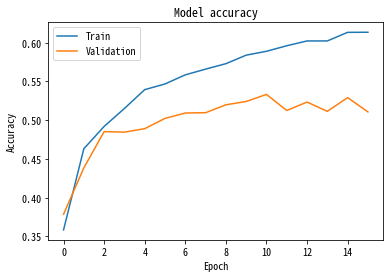

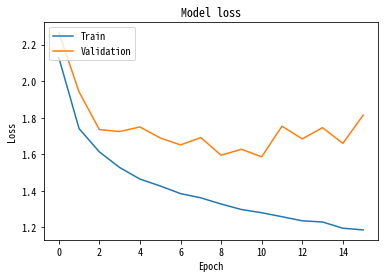

In [93]:
# 繪製訓練 & 驗證的準確率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 繪製訓練 & 驗證的缺失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step12 匯入精確值最高的Model

In [51]:
# Load 精確值最高的Model作為本次預測
model.load_weights(checkpoint_filepath)

In [52]:
import numpy as np
from PIL import Image
import tensorflow.keras.preprocessing.image as image

In [53]:
from keras.layers import Lambda


# Step13 手動預測測試

In [74]:
lab_rand = class_names[np.random.randint(0,49)] #50種挑其中一類
testdir = os.path.join('/content/gdrive/MyDrive/四下/FINAL_PROJECT/Train/train',lab_rand)
#選出其中一張照片的路徑
testimg=os.path.join(testdir,os.listdir(testdir)[np.random.randint(0,len(testdir)-1)])
x = image.load_img(testimg,target_size=(224,224))
origin = x.copy()
#模型輸出種類及預測機率 top-5
x = np.expand_dims(x, axis = 0) 
pred = model.predict(x)[0]
top_inds = pred.argsort()[::-1][:5]
for i in top_inds:
  print(' {:.3f} {}'.format(pred[i], class_names[i]))

 0.913 馬鈴薯燉肉
 0.028 麥克雞塊
 0.024 瓜仔肉
 0.017 麻婆豆腐
 0.010 葡萄


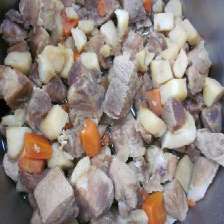

In [75]:
origin

# Step14 實作Confusion Matrix

In [76]:
from keras.preprocessing.image import ImageDataGenerator
import numpy

In [77]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    '/content/gdrive/MyDrive/四下/FINAL_PROJECT/Test/test', # Put your path here
    target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)

Found 7002 images belonging to 50 classes.


In [78]:
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [79]:
predicted_classes = numpy.argmax(predictions, axis=1)


In [80]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [81]:
import sklearn.metrics as metrics

In [82]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

         三杯雞       0.36      0.34      0.35       134
        什錦炒麵       0.62      0.65      0.64       158
         咖哩雞       0.49      0.58      0.53       153
        塔香海茸       0.67      0.72      0.69       137
         大陸妹       0.51      0.28      0.36       144
        客家小炒       0.41      0.52      0.46       153
         小番茄       0.92      0.73      0.81       171
       有機小松菜       0.32      0.15      0.20       129
       有機青松菜       0.24      0.16      0.19        99
          木瓜       0.68      0.59      0.63       162
          柳丁       0.75      0.47      0.58       143
          棗子       0.69      0.73      0.71       173
          橘子       0.61      0.68      0.64       155
        沙茶肉片       0.21      0.19      0.20       128
          油菜       0.31      0.23      0.26       146
        洋蔥炒蛋       0.34      0.31      0.32       124
          滷蛋       0.80      0.69      0.74       155
         滷雞腿       0.77    

In [83]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        if(len(t)==0):
          break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

    plt.figure(figsize=(20,20))
    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

# Step15 視覺化ClassificationReport

[0.36, 0.34, 0.35]
[0.62, 0.65, 0.64]
[0.49, 0.58, 0.53]
[0.67, 0.72, 0.69]
[0.51, 0.28, 0.36]
[0.41, 0.52, 0.46]
[0.92, 0.73, 0.81]
[0.32, 0.15, 0.2]
[0.24, 0.16, 0.19]
[0.68, 0.59, 0.63]
[0.75, 0.47, 0.58]
[0.69, 0.73, 0.71]
[0.61, 0.68, 0.64]
[0.21, 0.19, 0.2]
[0.31, 0.23, 0.26]
[0.34, 0.31, 0.32]
[0.8, 0.69, 0.74]
[0.77, 0.49, 0.6]
[0.52, 0.79, 0.63]
[0.69, 0.56, 0.62]
[0.35, 0.67, 0.46]
[0.78, 0.92, 0.85]
[0.47, 0.12, 0.19]
[0.22, 0.08, 0.11]
[0.51, 0.76, 0.61]
[0.44, 0.16, 0.23]
[0.57, 0.54, 0.56]
[0.5, 0.42, 0.46]
[0.28, 0.58, 0.38]
[0.36, 0.28, 0.32]
[0.71, 0.89, 0.79]
[0.4, 0.27, 0.32]
[0.52, 0.51, 0.51]
[0.82, 0.75, 0.78]
[0.57, 0.35, 0.43]
[0.85, 0.65, 0.73]
[0.92, 0.64, 0.75]
[0.7, 0.54, 0.61]
[0.4, 0.42, 0.41]
[0.82, 0.93, 0.87]
[0.54, 0.84, 0.65]
[0.46, 0.32, 0.37]
[0.6, 0.57, 0.59]
[0.59, 0.48, 0.53]
[0.46, 0.59, 0.52]
[0.53, 0.56, 0.55]
[0.66, 0.7, 0.68]
[0.31, 0.65, 0.42]
[0.28, 0.46, 0.35]
[0.26, 0.37, 0.3]


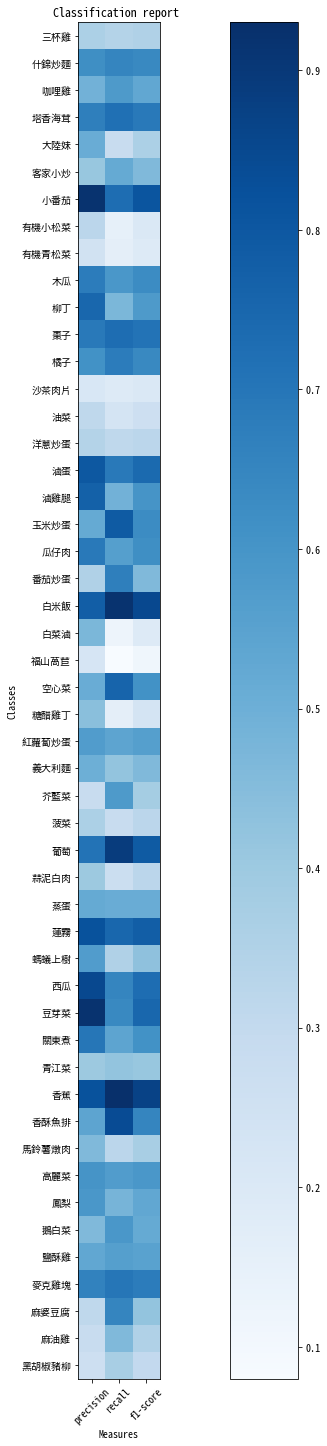

In [84]:
sampleClassificationReport = report


plot_classification_report(cr=sampleClassificationReport)

In [85]:
# 模型輸出儲存的檔案
WEIGHTS_FINAL = '/content/gdrive/MyDrive/model.h5'
# 儲存訓練好的模型
model.save(WEIGHTS_FINAL)

# Step16 計算總執行時間
* 根據計算為9590秒=約159分鐘

In [86]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 9590.108124494553


# Step17 匯入完整的資料集 進行訓練

In [112]:
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  seed = 1020,
  image_size = (img_height , img_width),
  batch_size = 64
)
train_ds2 = train_ds2.prefetch(buffer_size=AUTOTUNE)


Found 27933 files belonging to 50 classes.


In [113]:
inputs = layers.Input(shape=(img_height,img_width,3))
x_2 = data_augmentation(inputs)
x_2 = rescaling_layer(x_2)

In [115]:
callback2 = tensorflow.keras.callbacks.EarlyStopping(monitor='loss',patience=6)
checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback2 = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True
)

In [117]:
lrop2 = ReduceLROnPlateau(monitor='loss', mode='min', patience= 3, factor= 0.2, min_lr= 1e-6, verbose=1)

# Step18 模型訓練完整資料集

In [119]:
history = model.fit(
    train_ds2,
    epochs=20,
    callbacks = [callback2,model_checkpoint_callback2,lrop2]
)


Epoch 1/20
437/437 [==============================] - 131s 296ms/step - loss: 1.3072 - accuracy: 0.5830 - top5 accuracy: 0.9032
Epoch 2/20
437/437 [==============================] - 125s 283ms/step - loss: 1.2738 - accuracy: 0.5935 - top5 accuracy: 0.9124
Epoch 3/20
437/437 [==============================] - 125s 283ms/step - loss: 1.2692 - accuracy: 0.5921 - top5 accuracy: 0.9133
Epoch 4/20
437/437 [==============================] - 125s 284ms/step - loss: 1.2480 - accuracy: 0.5988 - top5 accuracy: 0.9142
Epoch 5/20
437/437 [==============================] - 125s 283ms/step - loss: 1.2206 - accuracy: 0.6091 - top5 accuracy: 0.9181
Epoch 6/20
437/437 [==============================] - 125s 283ms/step - loss: 1.2124 - accuracy: 0.6112 - top5 accuracy: 0.9188
Epoch 7/20
437/437 [==============================] - 125s 284ms/step - loss: 1.1995 - accuracy: 0.6114 - top5 accuracy: 0.9205
Epoch 8/20
437/437 [==============================] - 125s 283ms/step - loss: 1.1775 - accuracy: 0.6202 

# Step19 輸出準確率與損失值圖

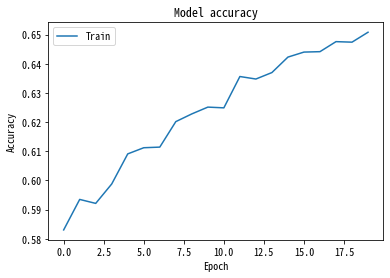

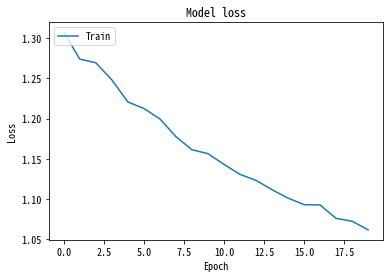

In [147]:
# 繪製訓練的準確率值
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 繪製訓練的損失值
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step20 手動預測測試

In [148]:
lab_rand = class_names[np.random.randint(0,49)] #50種挑其中一類
testdir = os.path.join('/content/gdrive/MyDrive/四下/FINAL_PROJECT/Train/train',lab_rand)
#選出其中一張照片的路徑
testimg=os.path.join(testdir,os.listdir(testdir)[np.random.randint(0,len(testdir)-1)])
x = image.load_img(testimg,target_size=(224,224))
origin = x.copy()
#模型輸出種類及預測機率 top-5
x = np.expand_dims(x, axis = 0) 
pred = model.predict(x)[0]
top_inds = pred.argsort()[::-1][:5]
for i in top_inds:
  print(' {:.3f} {}'.format(pred[i], class_names[i]))

 0.499 柳丁
 0.458 蓮霧
 0.043 橘子
 0.000 棗子
 0.000 滷蛋


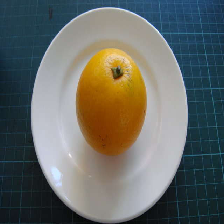

In [149]:
origin

In [141]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    '/content/gdrive/MyDrive/四下/FINAL_PROJECT/Test/test', # Put your path here
    target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)

Found 7002 images belonging to 50 classes.


In [142]:
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
predictions2 = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [143]:
predicted_classes2 = numpy.argmax(predictions2, axis=1)


# Step21 依序輸出各種食物的precision、recall、f1-score

In [144]:
report = metrics.classification_report(true_classes, predicted_classes2, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

         三杯雞       0.43      0.28      0.33       134
        什錦炒麵       0.73      0.47      0.57       158
         咖哩雞       0.50      0.38      0.43       153
        塔香海茸       0.71      0.77      0.74       137
         大陸妹       0.62      0.16      0.25       144
        客家小炒       0.38      0.61      0.47       153
         小番茄       0.84      0.83      0.83       171
       有機小松菜       0.30      0.17      0.22       129
       有機青松菜       0.21      0.38      0.28        99
          木瓜       0.74      0.81      0.77       162
          柳丁       0.73      0.42      0.53       143
          棗子       0.76      0.72      0.74       173
          橘子       0.46      0.85      0.59       155
        沙茶肉片       0.24      0.16      0.20       128
          油菜       0.17      0.02      0.04       146
        洋蔥炒蛋       0.42      0.36      0.39       124
          滷蛋       0.94      0.50      0.66       155
         滷雞腿       0.72    

# Step22 視覺化分類報告

[0.43, 0.28, 0.33]
[0.73, 0.47, 0.57]
[0.5, 0.38, 0.43]
[0.71, 0.77, 0.74]
[0.62, 0.16, 0.25]
[0.38, 0.61, 0.47]
[0.84, 0.83, 0.83]
[0.3, 0.17, 0.22]
[0.21, 0.38, 0.28]
[0.74, 0.81, 0.77]
[0.73, 0.42, 0.53]
[0.76, 0.72, 0.74]
[0.46, 0.85, 0.59]
[0.24, 0.16, 0.2]
[0.17, 0.02, 0.04]
[0.42, 0.36, 0.39]
[0.94, 0.5, 0.66]
[0.72, 0.64, 0.68]
[0.62, 0.7, 0.65]
[0.93, 0.5, 0.65]
[0.34, 0.67, 0.45]
[0.82, 0.85, 0.84]
[0.61, 0.14, 0.23]
[0.29, 0.08, 0.12]
[0.65, 0.63, 0.64]
[0.33, 0.3, 0.31]
[0.55, 0.62, 0.58]
[0.49, 0.55, 0.51]
[0.25, 0.61, 0.35]
[0.45, 0.44, 0.44]
[0.91, 0.81, 0.86]
[0.37, 0.21, 0.27]
[0.58, 0.69, 0.63]
[0.77, 0.91, 0.83]
[0.61, 0.48, 0.54]
[0.8, 0.73, 0.76]
[0.84, 0.78, 0.81]
[0.66, 0.68, 0.67]
[0.38, 0.36, 0.37]
[0.92, 0.91, 0.92]
[0.8, 0.74, 0.77]
[0.39, 0.45, 0.42]
[0.63, 0.62, 0.63]
[0.7, 0.66, 0.68]
[0.37, 0.79, 0.5]
[0.64, 0.57, 0.6]
[0.79, 0.86, 0.82]
[0.43, 0.64, 0.51]
[0.44, 0.42, 0.43]
[0.32, 0.53, 0.4]


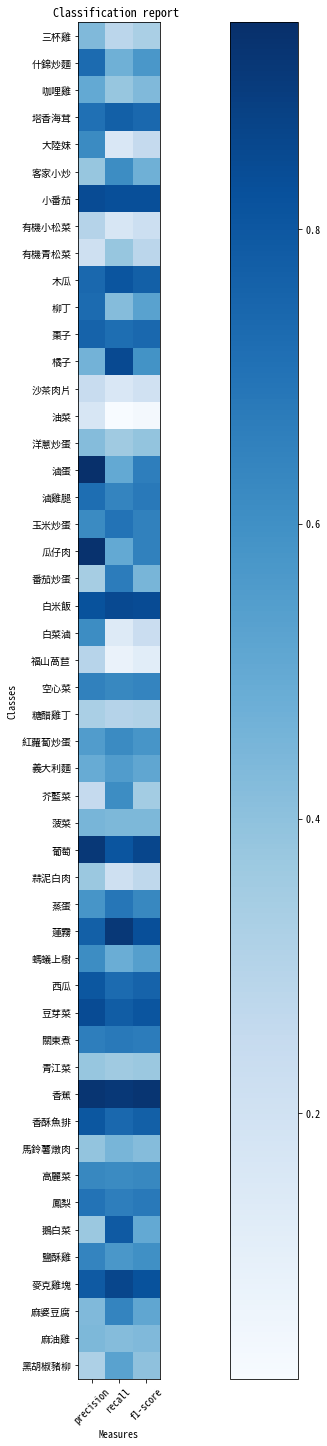

In [145]:
sampleClassificationReport = report


plot_classification_report(cr=sampleClassificationReport)

# Step 23第二個模型執行時間
* 15274-9590 = 5684秒 = 94分鐘

In [150]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 15274.943304538727
